##Introduction##

Let's pretend that instead of building a single model to solve a classification problem, you created five independent models, and each model was correct about 70% of the time. If you combined these models into an "ensemble" and used their majority vote as a prediction, how often would the ensemble be correct?

In [41]:
import numpy as np

# set a seed for reproducibility
np.random.seed(1234)

# generate 1000 random numbers (between 0 and 1) for each model, representing 1000 observations
mod1 = np.random.rand(1000)
mod2 = np.random.rand(1000)
mod3 = np.random.rand(1000)
mod4 = np.random.rand(1000)
mod5 = np.random.rand(1000)

# each model independently predicts 1 (the "correct response") if random number was at least 0.3
preds1 = np.where(mod1 > 0.3, 1, 0)
preds2 = np.where(mod2 > 0.3, 1, 0)
preds3 = np.where(mod3 > 0.3, 1, 0)
preds4 = np.where(mod4 > 0.3, 1, 0)
preds5 = np.where(mod5 > 0.3, 1, 0)

# print the first 20 predictions from each model
print preds1[:20]
print preds2[:20]
print preds3[:20]
print preds4[:20]
print preds5[:20]

[0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0]
[1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1]
[1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0]
[0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1]


In [42]:
# average the predictions and then round to 0 or 1
ensemble_preds = np.round((preds1 + preds2 + preds3 + preds4 + preds5)/5.0).astype(int)

# print the ensemble's first 20 predictions
print ensemble_preds[:20]

[1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


In [43]:
# how accurate was each individual model?
print preds1.mean()
print preds2.mean()
print preds3.mean()
print preds4.mean()
print preds5.mean()

0.713
0.665
0.717
0.712
0.687


In [44]:
# how accurate was the ensemble?
print ensemble_preds.mean()

0.841


**Ensemble Learning**:
Combining several predictive models in order to produce a combined model that is more accurate than any individual model.

- **Regression**: takes the average of the predictions
- **Classification**: takes majority vote or average of predicted probabilities

In order for ensembling to be effective, the models must be **accurate** and **independent**.
- Counting on them making *different* mistakes 

###Ensembling Methods###

Two basic methods:
1. Models that ensemble for you
2. Manually ensemble your individual models

What makes good manual ensembles?
- Different types of models
- Different commbinations of features
- Different tuning parameters

##Bagging##

**How does bagging work for decision trees?**

1. Grow B trees using B bootstrap samples from the training data
2. Train each tree on its bootstrap sample and make predictions
3. Combine the predictions:
- Regression: aveg predictions
- Classification: majority vote

Other things:
- Each sample should be the same size as the original training set
- B should be large enough value that error seems to have "stabilized"
- The trees are grown deep so that they have low bias/high variance

We're increasing bias because the data is wonky but we're reducing the variance. Similar to cross validation.

In [45]:
# set a seed for reproducibility
np.random.seed(1)

# create an array of 1 through 20
nums = np.arange(1, 21)
print nums

# sample that array 20 times with replacement
print np.random.choice(a=nums, size=20, replace=True)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 6 12 13  9 10 12  6 16  1 17  2 13  8 14  7 19  6 19 12 11]


In [46]:
# manually implementing bagged decision trees

# read in and prepare the vehicle training data
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/vehicles_train.csv'
train = pd.read_csv(url)
train['vtype'] = train.vtype.map({'car':0, 'truck':1})
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0
5,4000,2006,124000,2,0
6,3000,2004,177000,4,0
7,2000,2004,209000,4,1
8,3000,2003,138000,2,0
9,1900,2003,160000,4,0


In [47]:
# set a seed for reproducibility
np.random.seed(123)

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=14, size=14, replace=True) for _ in range(1, 11)]
samples # row index we'll be selecting for our sample

[array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1]),
 array([ 9,  0,  0,  9,  3, 13,  4,  0,  0,  4,  1,  7,  3,  2]),
 array([ 4,  7,  2,  4,  8, 13,  0,  7,  9,  3, 12, 12,  4,  6]),
 array([ 1,  5,  6, 11,  2,  1, 12,  8,  3, 10,  5,  0, 11,  2]),
 array([10, 10,  6, 13,  2,  4, 11, 11, 13, 12,  4,  6, 13,  3]),
 array([10,  0,  6,  4,  7, 11,  6,  7,  1, 11, 10,  5,  7,  9]),
 array([ 2,  4,  8,  1, 12,  2,  1,  1,  3, 12,  5,  9,  0,  8]),
 array([11,  1,  6,  3,  3, 11,  5,  9,  7,  9,  2,  3, 11,  3]),
 array([ 3,  8,  6,  9,  7,  6,  3,  9,  6, 12,  6, 11,  6,  1]),
 array([13, 10,  3,  4,  3,  1, 13,  0,  5,  8, 13,  6, 11,  8])]

In [48]:
# show the rows for the first decision tree
train.iloc[samples[0], :]

,price,year,miles,doors,vtype
13,1300,1997,138000,4,0
2,13000,2010,73500,4,0
12,1800,1999,163000,2,1
2,13000,2010,73500,4,0
6,3000,2004,177000,4,0
1,14000,2010,30000,2,0
3,9500,2009,78000,4,0
10,2500,2003,190000,2,1
11,5000,2001,62000,4,0
9,1900,2003,160000,4,0


In [49]:
# read in and prepare the vehicle testing data
url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/vehicles_test.csv'
test = pd.read_csv(url)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [50]:
from sklearn.tree import DecisionTreeRegressor

# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# list for storing predicted price from each tree
predictions = []

# define testing data
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

# grow one tree for each bootstrap sample and make predictions on testing data
for sample in samples:
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)

# convert predictions from list to NumPy array
predictions = np.array(predictions)
predictions

array([[  1300.,   5000.,  14000.],
       [  1300.,   1300.,  13000.],
       [  2000.,   9000.,  13000.],
       [  4000.,   5000.,  13000.],
       [  1300.,   5000.,  13000.],
       [  4000.,   5000.,  14000.],
       [  4000.,   9000.,  14000.],
       [  4000.,   5000.,  13000.],
       [  3000.,   5000.,   9500.],
       [  4000.,   5000.,   9000.]])

In [51]:
# average predictions
np.mean(predictions, axis=0)

array([  2890.,   5430.,  12550.])

In [52]:
# calculate RMSE
from sklearn import metrics
y_pred = np.mean(predictions, axis=0)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

461.6997581401431

**Bagged decision trees in scikit-learn**

In [53]:
# define the training and testing sets
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [54]:
# instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator"
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=1)

In [55]:
# fit and predict
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([  3351.2,   5384.4,  12971. ])

In [56]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

694.05710619996307

### Estimating out-of-sample error###

For bagged models, oos error can be estimated without using train/test split or cross validation.
- On avg, each bagged tree uses about 2/3 of the observations.
- The remaining observations are called "out of bag" observations

In [57]:
# show the first bootstrap sample
samples[0]

array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1])

In [58]:
# show the "in-bag" observations for each sample
for sample in samples:
    print set(sample)

set([0, 1, 2, 3, 6, 9, 10, 11, 12, 13])
set([0, 1, 2, 3, 4, 7, 9, 13])
set([0, 2, 3, 4, 6, 7, 8, 9, 12, 13])
set([0, 1, 2, 3, 5, 6, 8, 10, 11, 12])
set([2, 3, 4, 6, 10, 11, 12, 13])
set([0, 1, 4, 5, 6, 7, 9, 10, 11])
set([0, 1, 2, 3, 4, 5, 8, 9, 12])
set([1, 2, 3, 5, 6, 7, 9, 11])
set([1, 3, 6, 7, 8, 9, 11, 12])
set([0, 1, 3, 4, 5, 6, 8, 10, 11, 13])


In [59]:
# show the "out-of-bag" observations for each sample
for sample in samples:
    print sorted(set(range(14)) - set(sample))

[4, 5, 7, 8]
[5, 6, 8, 10, 11, 12]
[1, 5, 10, 11]
[4, 7, 9, 13]
[0, 1, 5, 7, 8, 9]
[2, 3, 8, 12, 13]
[6, 7, 10, 11, 13]
[0, 4, 8, 10, 12, 13]
[0, 2, 4, 5, 10, 13]
[2, 7, 9, 12]


How to calculate **out of bag error**

1. For every observation in the training data, predict its response value using only the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a majority vote (for classification).
2. Compare all predictions to the actual response values in order to compute the out-of-bag error.

When we're bagging data, we're artificially creating out of sample data which then we use the trees (that didn't contain that observation) to predict. When B is sufficiently large, the out of bag error is an accurate estimate of out of sample error

In [60]:
# compute the out-of-bag R-squared score (not MSE, unfortunately!) for B=500
bagreg.oob_score_

0.7661434140978729

## Random Forests ##



### Exploring and preparing the data ###

In [61]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/hitters.csv'
hitters = pd.read_csv(url)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [62]:
hitters.columns

Index([u'AtBat', u'Hits', u'HmRun', u'Runs', u'RBI', u'Walks', u'Years',
       u'CAtBat', u'CHits', u'CHmRun', u'CRuns', u'CRBI', u'CWalks', u'League',
       u'Division', u'PutOuts', u'Assists', u'Errors', u'Salary',
       u'NewLeague'],
      dtype='object')

In [63]:
pd.crosstab(hitters.League, hitters.NewLeague)

NewLeague,A,N
League,,
A,166,9
N,10,137


In [64]:
hitters.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [65]:
hitters.dropna(inplace=True)

In [66]:
pd.factorize(hitters.League)
# converts As and Ns to 0s and 1s
# automatically maps
# outputs a tuple

# element 0 = actual array
# element 1 = the new index

(array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 1]), Index([u'N', u'A'], dtype='object'))

In [73]:
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]

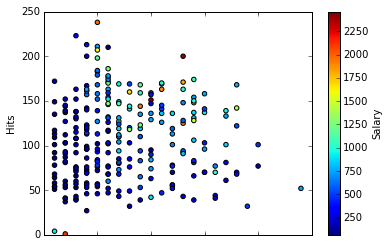

In [68]:
%matplotlib inline
hitters.plot(kind='scatter', x = 'Years', y = 'Hits', c = 'Salary', colormap = 'jet', xlim=(0,25), ylim=(0,250))

In [69]:
hitters.columns

Index([u'AtBat', u'Hits', u'HmRun', u'Runs', u'RBI', u'Walks', u'Years',
       u'CAtBat', u'CHits', u'CHmRun', u'CRuns', u'CRBI', u'CWalks', u'League',
       u'Division', u'PutOuts', u'Assists', u'Errors', u'Salary',
       u'NewLeague'],
      dtype='object')

In [70]:
# remove all features that start with C

hitters.columns.str.startswith('C') # gets True False array

feature_cols = hitters.columns[hitters.columns.str.startswith('C') == False]
feature_cols = feature_cols.drop('Salary')

In [71]:
X = hitters[feature_cols]
y = hitters.Salary

### Predicting salary with a decision tree ###

Find the best max_depth for a decision tree using cross_validation

In [74]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

# plot max_depth (x-axis) versus RMSE (y-axis)
import matplotlib.pyplot as plt
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

ValueError: could not convert string to float: W